# Project 1 - Three milestones 

**Leo Correia**

In this notebook I publish the code for the three first milestones for  **Data Manipulation and ARIMA Modeling with Pyramid**

The idea is to set all three milestones in the same notebook 


# 1 - Before the milestones: Loading the packages 

The next cell loads the packages I will be using to clear the milestones 

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)



import numpy as np 
import pandas as pd


import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure



from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.seasonal import STL



# 2 - Milestone 1 - Create a Weekly series for hotel cancellation 

The flow is very straightforward.

* Load the panda package
* Load the data
* Concatenate year and week as strings
* sum the cancelation with *groupby* method 

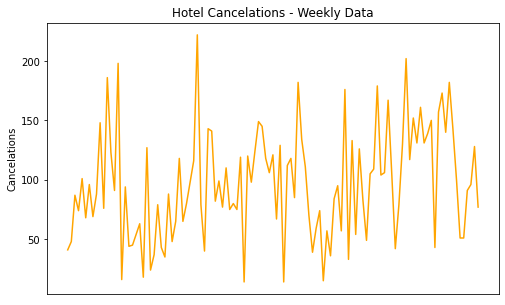

In [2]:

#Load the data 

mainData = pd.read_csv('H1.csv')

# Concatenate the  year with the week 

mainData['year_week'] = mainData['ArrivalDateYear'].astype('str') + mainData['ArrivalDateWeekNumber'].astype('str')


# using the method group by year_week to sum the canceled number

weeklyData = mainData.groupby(['year_week'], as_index=False)['IsCanceled'].sum()


# Plot a line graph on the number of cancellations 


fig, ax =  plt.subplots()

fig.set_size_inches(8.09, 5, forward= True)
ax.plot(weeklyData['year_week'], weeklyData['IsCanceled'], color= 'orange')

ax.set_title('Hotel Cancelations - Weekly Data')
ax.set_ylabel('Cancelations')
ax.set_xlabel('Time')


ax.get_xaxis().set_visible(False)

plt.show()


# 2 - Milestone 2 - Time series componentes 

To clear this milestone, I need to :

* Decompose the time series into its structural elements 
* Generate autocorrelation and partial autocorrelation plots for the time series.
* Calculate a 4-week moving average on the time series and plot this moving average against the actual time series 

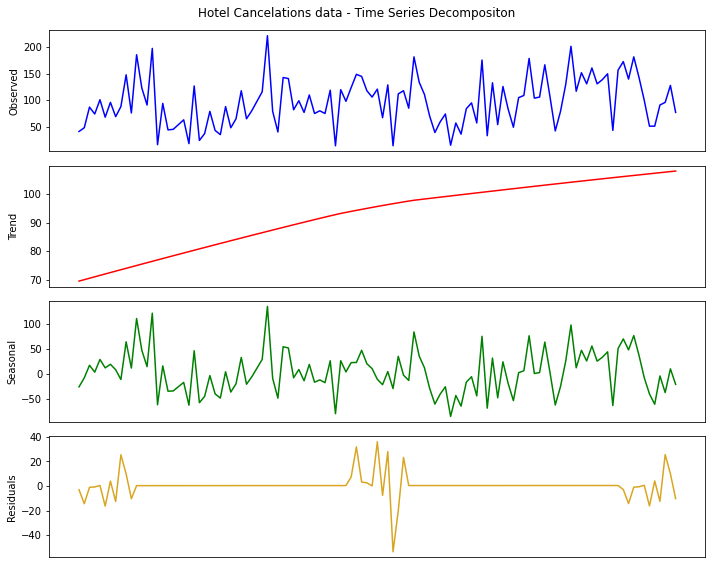

In [3]:
#### PART 1 - DECOMPOSE THE TIME SERIES INTO ITS STRUCTURAL ELEMENTS 

## running the decomposition with statsmodel 


decomposition = STL(weeklyData['IsCanceled'], period=52).fit() 



#creating the plot 


fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True,figsize=(10,8)) 


ax1.plot(decomposition.observed, color = 'blue')
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend, color = 'red')
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal, color= 'green')
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition.resid, color = 'goldenrod')
ax4.set_ylabel('Residuals')


fig.suptitle('Hotel Cancelations data - Time Series Decompositon')

ax1.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax3.get_xaxis().set_visible(False)
ax4.get_xaxis().set_visible(False)


plt.tight_layout()


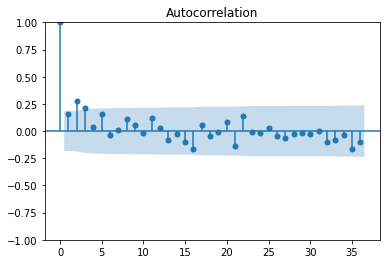

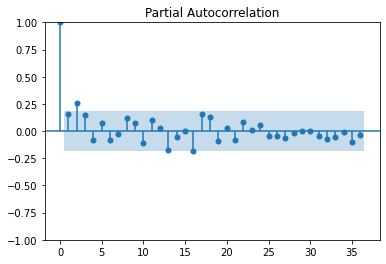

In [4]:
#### PART 2 - GEENERATE TEH ACF AND PACF PLOTS FOR THE HOTEL CANCELATION DATA 




plot_acf(x= weeklyData['IsCanceled'], lags=36);


plot_pacf(x= weeklyData['IsCanceled'], lags=36, method="ywm");




In [5]:
#### PART 3  - SETTING THE MOVING AVERAGE 


weeklyData['ma_cancels'] = weeklyData['IsCanceled'].rolling(window=4).mean()




### set the Data into train and test for plotting 
### train data = 90% of original data withouth the NA generated from MA process

weeklyDataTrain = weeklyData.loc[3:104,:]

weeklyDataTest = weeklyData.loc[100:,:]


### plot the ma and the observed data 


fig, ax5 = plt.subplots(figsize=(10,6.2)) 


ax5.plot(weeklyDataTrain['year_week'], weeklyDataTrain['IsCanceled'] ,  color = 'goldenrod', 
        label='Observed')

ax5.plot(weeklyDataTrain['year_week'], weeklyDataTrain['ma_cancels'] ,  color = 'blue', 
        label='MA 4 weeks')

ax5.set_title("Observed Cancelations and MA 4")

ax5.set_ylabel('# Cancellation')

ax5.legend()


ax5.get_xaxis().set_visible(False)
plt.show()


AttributeError: 'DataFrame' object has no attribute 'rese'

In [ ]:
weeklyDataTest['ma_forecast'] =  weeklyDataTrain['ma_cancels'].iloc[-1]

weeklyDataTest

In [ ]:
#### PART 4 -  using the MA as a forecast for cancel number


### given the convergence that MA will have, we can consider the last MA number
### saw in the train test as the forecast for the test period 

weeklyDataTest['ma_forecast'] =  weeklyDataTrain['ma_cancels'].iloc[-1]


fig, ax6 = plt.subplots(figsize=(10,6.2)) 


ax6.plot(weeklyDataTest['year_week'], weeklyDataTest['IsCanceled'] ,  color = 'sienna', 
        label='Observed - Test')

ax6.plot(weeklyDataTest['year_week'],   weeklyDataTest['ma_forecast'],  color = 'royalblue', 
label='MA 4 weeks Training')

ax6.set_title("Observed Cancelations and MA 4 - Test Set")

ax6.set_ylabel('# Cancellation')

ax6.legend()


ax6.get_xaxis().set_visible(False)
plt.show()






